# Agrupando os dados do modelo



1. Vamos reduzir a dimensão usando t-SNE: isso é para vermos, intuitivamente, qual o número "ótimo" de clusters dos dados

2. Vamos usar o algoritmo KMeans para agrupar nossos dados. Primeiro faremos 1 cluster apenas e depois vamos aumentando o número de clusters até chegar ao "ótimo"

## t-SNE

https://github.com/zhmz90/BHTsne.jl Julia não consegue instalar esse pacote porque houve uma mudança no "Pkg.add()" e o repositório está configurado para a versão anterior

https://github.com/lejon/TSne.jl Usando este.

Na verdade, vou usar o pacote TSne e usar o código do BHTSne, pois este usa Gadfly

### Interpretação


https://distill.pub/2016/misread-tsne/

O importante é usar parâmetro "perplexity" adequado para ele gerar os clusters.

Precauções:
1. Tamanho dos clusters ou distancia entre eles pode significar nada
2. O algoritmo usa escolhas aleatórias, então podemos ter resultados diferentes a cada vez que rodamos o código. Solução para isso: rodar o código várias vezes para ter certeza que convergiu

Logo, para o nosso caso, não há problema. Queremos saber apenas quantos clusters existem. Não iremos interpretar o formato das imagens ou algo do gênero.

In [1]:
using Pkg

In [2]:
using TSne, RDatasets, Gadfly, DataFrames

┌ Info: Precompiling TSne [24678dba-d5e9-5843-a4c6-250288b04835]
└ @ Base loading.jl:1278
┌ Info: Precompiling RDatasets [ce6b1742-4840-55fa-b093-852dadbb1d8b]
└ @ Base loading.jl:1278


┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter C:\Users\Zé\.julia\packages\ProgressMeter\Vf8un\src\ProgressMeter.jl:620
Computing t-SNE100%|████████████████████████████████████| Time: 0:00:00
  KL_divergence:  0.1875


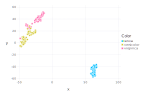

In [3]:
iris = dataset("datasets","iris")
X = convert(Matrix{Float64}, iris[:, 1:4])
labels = iris[:, 5]
plotname = "iris"
initial_dims = -1
iterations = 1500
perplexity = 15


#o que significa esse 2 aqui?
# Y = tsne(X, 2, initial_dims, iterations, perplexity)
Y = tsne(X, 3, initial_dims, iterations, perplexity)

theplot = plot(x=Y[:,1], y=Y[:,2], color=labels)

### PCA


Versão estável do pacote em Julia

https://multivariatestatsjl.readthedocs.io/en/stable/pca.html



┌ Info: Precompiling MultivariateStats [6f286f6a-111f-5878-ab1e-185364afe411]
└ @ Base loading.jl:1278


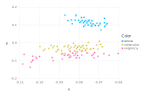

In [4]:
using MultivariateStats

pca_y = fit(PCA, X, maxoutdim=3)
Y = projection(pca_y)

plot(x = Y[:,1], y=Y[:,2], color=labels)

## KMeans

In [5]:
using Clustering

┌ Info: Precompiling Clustering [aaaa29a8-35af-508c-8bc3-b662a17a0fe5]
└ @ Base loading.jl:1278


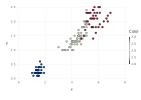

In [6]:
features = collect(Matrix(iris[:, 1:4])'); # features to use for clustering




nclusters = 3

result = kmeans(features, nclusters)
theplot = plot(x=iris.PetalLength, y=iris.PetalWidth, 
    color=result.assignments)

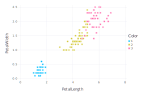

In [7]:
#melhorando o gráfico com meus recém-adquiridos conhecimentos de Gadfly
theplot = plot(iris, x=:PetalLength, y=:PetalWidth, 
    color=result.assignments,
    Scale.color_discrete(levels=[1, 2, 3]))

## Dados do projeto

Agora vamos ler os dados do projeto e refazer os passos do exemplo acima

In [8]:
using CSV, DataFrames

In [9]:
dfdata_clusters = DataFrame(CSV.File("data_clusters.csv"));



In [10]:
dfdata_clusters[:,end-2:end]

,Dj_D,L_D,Vh_D
,Float64,Float64,Float64
1,0.488529,3.11008,3.35731
2,0.907601,0.0588918,1.038
3,0.749037,0.2405,0.846488
4,0.988443,0.270958,0.408618
5,0.503475,0.19766,0.654567
6,0.678465,0.23698,1.43583
7,0.989821,0.0181442,0.357144
8,0.558472,0.0867283,0.279949
9,0.877208,0.19941,0.245458


Gráficos de Vh/D vs L/D

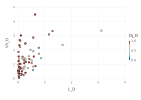

In [11]:
#gráfico sem escalas
plot(dfdata_clusters, x=:L_D, y=:Vh_D, color=:Dj_D)

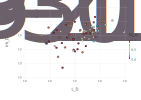

In [12]:
#mesmo gráfico acima, mas em escala logaritmica
plot(dfdata_clusters, x=:L_D, y=:Vh_D, color=:Dj_D, 
Scale.x_log10, Scale.y_log10)

Gráficos de Vh/D vs Dj/D

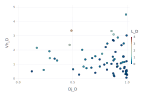

In [13]:
#gráfico do Vh_D vs Dj_D
plot(dfdata_clusters, x=:Dj_D, y=:Vh_D, color=:L_D)

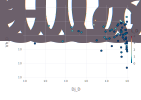

In [14]:
#mesmo gráfico acima, mas em escala logaritmica
plot(dfdata_clusters, x=:Dj_D, y=:Vh_D, color=:L_D, 
Scale.x_log10, Scale.y_log10)

t-SNE

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter C:\Users\Zé\.julia\packages\ProgressMeter\Vf8un\src\ProgressMeter.jl:620
Computing t-SNE100%|████████████████████████████████████| Time: 0:00:00
  KL_divergence:  0.1153


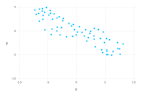

In [15]:
#visualização com t-sne
X = convert(Matrix, dfdata_clusters[:, end-2:end])

initial_dims = -1
iterations = 10000
perplexity = 20



Y = tsne(X, 2, initial_dims, iterations, perplexity)
theplot = plot(x=Y[:,1], y=Y[:,2])

#cada iteração dá um resultado diferente. Olhar com calma depois

PCA

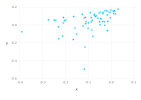

In [16]:
pca_y = fit(PCA, X, maxoutdim=2)
Y = projection(pca_y)

plot(x = Y[:,1], y=Y[:,2])

KMeans

In [17]:
#agrupamento conforme KMeans
#primeiro para 1 cluster

#DUV: não entendi porque ele usa a matriz transposta aqui
features = collect(Matrix(dfdata_clusters[:, end-2:end])'); # features to use for clustering

In [18]:
# dfdata_clusters[:, end-2:end]

In [39]:
features = X';

nclusters = 2

result = kmeans(features, nclusters);

#Dj_D, L_D, Vh_D
result.centers

3×2 Array{Float64,2}:
 0.798632  0.754313
 0.200287  0.657987
 0.847154  2.61186

In [31]:
#quantidade de observações em cada cluster
result.counts

2-element Array{Int64,1}:
 49
 17

In [32]:
#o que é total cost? variância total?
result.totalcost

32.30481943336939

In [33]:
#o centro do result é o dado que irá ser usado para a estimação

#Dj/D, L/D, Vh/D
result.centers'

2×3 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 0.800548  0.196378  0.867988
 0.746185  0.696177  2.65561

In [37]:
#exportando os dados
CSV.write("nclusters_centers.csv", df)

"nclusters_centers.csv"

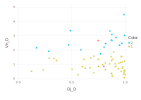

In [35]:

#criando uma dataframe com os centros dos clusters
df = DataFrame(result.centers')
rename!(df, :x1 => :Dj_D, :x2 => :L_D, :x3 => :Vh_D)


theplot = plot(layer(dfdata_clusters, x=:Dj_D, y=:Vh_D, 
    color=result.assignments),
                layer(x=df.Dj_D, y=df.Vh_D, Theme(default_color=color("red"), point_shapes=[Shape.cross]) ))

push!(theplot, Scale.color_discrete)
#http://gadflyjl.org/dev/gallery/shapes/


Basicamente agrupou entre os casos onde Vh_D é maior ou igual a 2 e os casos em que Vh_D é menor que 2. Tem só um ponto amarelo perto de Vh_D = 2 e perto de Dj_ = 0.8 que foge a esta regra.

In [65]:
result.centers'

2×3 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 0.800548  0.196378  0.867988
 0.746185  0.696177  2.65561

In [66]:
result.converged

true

In [67]:
#número de observações por cluster
result.counts

#ideia: usar nclusters tal que o número de observações em cada um seja maior que 1?

2-element Array{Int64,1}:
 49
 17

In [68]:
result.totalcost

32.30481943336939

### Calculando clusters com valor de liquidação diferente

In [87]:
#0.5L

df = dfdata_clusters[:, end-2:end]

df.L_D = df.L_D .* 0.5

X = convert(Matrix, df)

features = X'

nclusters = 2

result = kmeans(features, nclusters);

#Dj_D, L_D, Vh_D
result.centers

3×2 Array{Float64,2}:
 0.798042  0.753407
 0.106002  0.325567
 0.865354  2.6632

In [88]:
result.counts

2-element Array{Int64,1}:
 49
 17

In [84]:
#1.5L

df = dfdata_clusters[:, end-2:end]

df.L_D = df.L_D .* 1.5

X = convert(Matrix, df)

features = X'

nclusters = 2

result = kmeans(features, nclusters);

#Dj_D, L_D, Vh_D
result.centers

3×2 Array{Float64,2}:
 0.720852  0.81118
 1.05768   0.273918
 2.58766   0.856227

In [85]:
result.counts

2-element Array{Int64,1}:
 18
 48